In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import WeekdayLocator
from matplotlib.dates import DateFormatter
from matplotlib.dates import MO
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = pd.read_csv('data.csv')

# Data Transformation

In [2]:
df['CAMPAIGN'] = df['CAMPAIGN'].fillna('Other')
df['DATE'] = pd.to_datetime(df['DATE'])

In [3]:
# Grouping the dataframe by ORDER_ID and transforming it into the desired structure efficiently
def aggregate_rows(series):
    return series.tolist()

# Grouping by ORDER_ID and applying the custom aggregation function to each column except for ORDER_ID
transformed_df = df.groupby('ORDER_ID').agg({col: aggregate_rows for col in df.columns if col != 'ORDER_ID'}).reset_index()

# Converting the grouped dataframe back to a dictionary format as requested
transformed_data_efficient = transformed_df.to_dict(orient='records')

# For demonstration, convert it to the format where each ORDER_ID is a key to its own dictionary
transformed_data_dict = {item['ORDER_ID']: {k: v for k, v in item.items() if k != 'ORDER_ID'} for item in transformed_data_efficient}


In [4]:
new_df = pd.DataFrame.from_dict(transformed_data_dict, orient='index') #10317883
new_df['Basket Revenue'] = new_df['Revenue'].apply(lambda x:np.sum(x))
new_df['RSC/VW'] = new_df.apply(lambda row: [a/b for a, b in zip(row['Real_SHC'], row['DESI'])],axis=1)
new_df['R/RSC'] = new_df.apply(lambda row: [a/b for a, b in zip(row['Revenue'], row['Real_SHC'])],axis=1)
# Calculate the sum of Real_SHC for each row and add it as a new column
new_df['Sum_Real_SHC'] = new_df['Real_SHC'].apply(sum)

# Calculate the sum of DESI for each row and add it as a new column
new_df['Sum_DESI'] = new_df['DESI'].apply(sum)

# Calculate the ratio of the sum of Real_SHC to the sum of DESI for each row and add it as a new column
# This includes handling for division by zero by using np.nan for rows where sum of DESI is 0
new_df['Sum_Real_SHC/Sum_DESI'] = new_df.apply(lambda row: row['Sum_Real_SHC'] / row['Sum_DESI'] if row['Sum_DESI'] != 0 else np.nan, axis=1)
new_df['Basket_Revenue/Sum_Real_SHC'] = new_df.apply(lambda row: row['Basket Revenue'] / row['Sum_Real_SHC'] if row['Sum_Real_SHC'] != 0 else np.nan, axis=1)

In [5]:
new_df

,CARGO_ID,DATE,SKU,PRODUCT_NAME,SUB_CATEGORY,SUB_CATEGORY_CODE,QTY,Seller,DESI,SHIPPING_COMPANY,...,Real_SHC,Category,CFreeSH,Basket Revenue,RSC/VW,R/RSC,Sum_Real_SHC,Sum_DESI,Sum_Real_SHC/Sum_DESI,Basket_Revenue/Sum_Real_SHC
10000489,[6],[2017-04-25 00:00:00],[TELAKLMIBAND2],[Xiaomi Mi Band 2 Akıllı Bileklik Siyah],[Akıllı Saatler],[3407],[2],[PO],[1.0],[ARS],...,[1.2048395435],[TEL1],[False],167.65,[1.2048395435],[139.14715939102143],1.204840,1.00,1.204840,139.147159
10000900,[8],[2017-03-06 00:00:00],[HBV000001SXJP],[Sony Xperia XZ],[Cep Telefonu],[60],[1],[PO],[1.0],[ARS],...,[2.089839544],[TEL2],[False],1873.46,[2.089839544],[896.4611686953513],2.089840,1.00,2.089840,896.461169
10001219,[16],[2017-04-26 00:00:00],[HBV000001RJ34],[Sony Uch10 2.0A Hızlı Şarj Cihazı Seti Oem-Si...,[Şarj Cihazları],[534],[1],[MP],[1.0],[YIK],...,[3.60062202],[TEL1],[False],33.97,[3.60062202],[9.434480990037382],3.600622,1.00,3.600622,9.434481
10001432,[19],[2017-04-19 00:00:00],[EVUCZLKCLUCKY],[Fakir Lucky Elektirikli Süpürge],[Süpürgeler],[736],[1],[PO],[6.0],[ARS],...,[0.119037262],[HEA],[False],91.05,[0.019839543666666667],[764.8865445174637],0.119037,6.00,0.019840,764.886545
10001588,[20],[2017-04-22 00:00:00],[TELAKLCASE4UU8SYH],[Case 4U U8 Siyah iOS ve Android Uyumlu Akıllı...,[Akıllı Saatler],[3407],[1],[PO],[1.0],[ARS],...,[2.179839544],[TEL1],[False],30.50,[2.179839544],[13.991855539987396],2.179840,1.00,2.179840,13.991856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999806,[2444490],[2017-03-01 00:00:00],[PTTROPP14554],[Champion Dana Etli Köpek Maması Çalışan ve Ak...,[Köpek Maması],[2696],[1],[MP],[8.28],[ARS],...,[4.935598181],[PET],[False],37.65,[0.5960867368357488],[7.628254695638888],4.935598,8.28,0.596087,7.628255
99999841,"[2444494, 2444494, 2444494]","[2017-03-12 00:00:00, 2017-03-12 00:00:00, 201...","[ZYSAN914883, ZYKRISTAL259168, ZYGUR930225]",[Sarelle Şekersiz Kakaolu Fındık Ezmesi 350 gr...,"[Gıda Ürünü, Organik ve Dogal Ürünler, Gıda Ür...","[3580, 3039, 3580]","[1, 1, 1]","[PO, PO, PO]","[1.0, 5.0, 1.0]","[ARS, ARS, ARS]",...,"[0.478410972, 2.392054861, 0.478410972]","[BC, BC, BC]","[True, True, True]",122.87,"[0.478410972, 0.4784109722, 0.478410972]","[25.10393929677683, 41.01076509549168, 26.6716...",3.348877,7.00,0.478411,36.689913
99999851,[2444500],[2017-03-13 00:00:00],[ZYECZACI9470372],[Uni Baby Çamaşır Yumuşatıcı 1500 ml],[Deterjan ve Temizlik Malzemeleri],[3507],[2],[PO],[1.0],[ARS],...,[1.6248395435],[BC],[False],20.60,[1.6248395435],[12.678174951125566],1.624840,1.00,1.624840,12.678175
99999934,[2444513],[2017-04-08 00:00:00],[ZYPYON9998582],[Ariel Toz Çamaşır Deterjanı Dağ Esintisi 7 Kg...,[Deterjan ve Temizlik Malzemeleri],[3507],[2],[PO],[8.0],[ARS],...,[8.283160795],[BC],[False],86.29,[1.035395099375],[10.417520815494443],8.283161,8.00,1.035395,10.417521


In [6]:
new_df.loc[10317883]

CARGO_ID                       [2890, 2890, 2890, 2890, 2890, 2890, 2892, 289...
DATE                           [2017-04-25 00:00:00, 2017-04-25 00:00:00, 201...
SKU                            [ZYULKER0762202, ZYPYON928148, ZYECZACI9300228...
PRODUCT_NAME                   [Komili Yuvam Peçete 100lü, Febreze Hava Ferah...
SUB_CATEGORY                   [Kağıt Ürünleri, Deterjan ve Temizlik Malzemel...
SUB_CATEGORY_CODE              [3045, 3507, 3507, 1719, 3310, 3507, 3320, 350...
QTY                            [2, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Seller                         [PO, PO, PO, PO, PO, PO, PO, PO, PO, PO, PO, P...
DESI                           [1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0, ...
SHIPPING_COMPANY               [ARS, ARS, ARS, ARS, ARS, ARS, ARS, ARS, ARS, ...
CAMPAIGN                       [100 TL üzeri çatı, 100 TL üzeri çatı, 100 TL ...
FreeSH                         [False, False, False, False, False, False, Fal...
Weekend                     

# Basket Revenue (90th percentile)

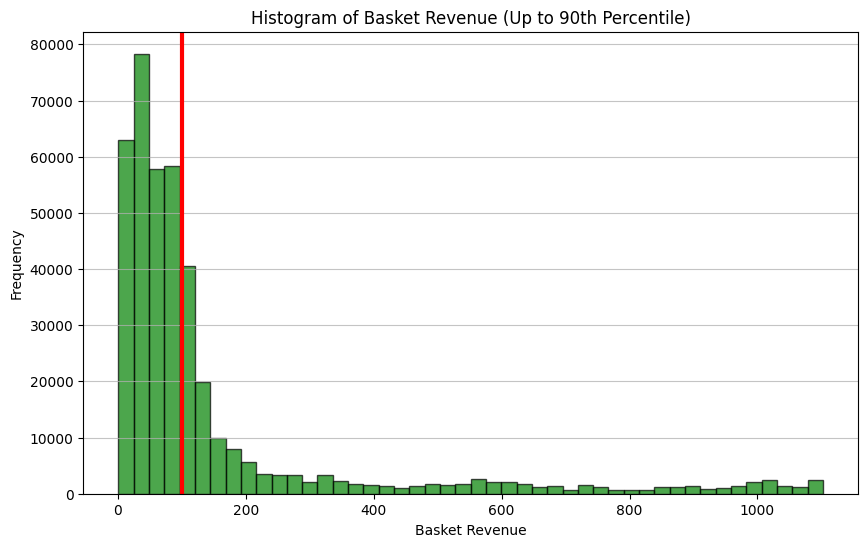

In [7]:
# Calculate the 0.90 percentile of the Basket Revenue to filter the data
percentile_90 = np.percentile(new_df['Basket Revenue'], 90)

# Filter the data to include only up to the 0.90 percentile
filtered_data = new_df[new_df['Basket Revenue'] <= percentile_90]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 90th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Baskets with "100TL üzeri çatı" campaign are rounded up to 100TL for baskets that have lower 'Basket Revenue' than 100TL

In [8]:
# Create a different subset based on the given conditions
subset_df = new_df.copy()

# Apply conditions: if 'CAMPAIGN' equals "100 TL üzeri çatı" in any items and 'Basket Revenue' < 100, set 'Basket Revenue' to 100
subset_df['Basket Revenue'] = subset_df.apply(
    lambda row: 100 if any(c == "100 TL üzeri çatı" for c in row['CAMPAIGN']) and row['Basket Revenue'] < 100 else row['Basket Revenue'],
    axis=1)

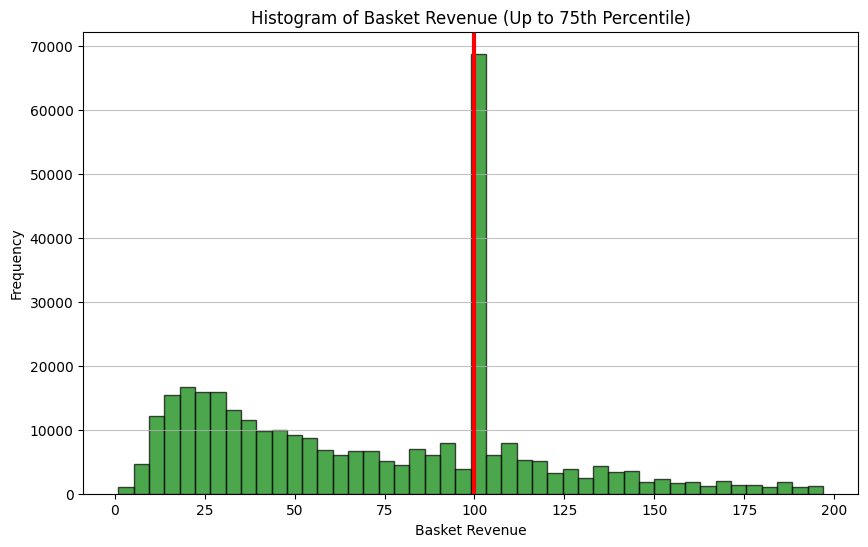

In [9]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(subset_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.90 percentile
filtered_data = subset_df[subset_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Baskets with "100TL üzeri çatı" campaign with below 100TL 'Basket Revenue' are removed from the dataset (58270 baskets are removed)

In [10]:
# Adjusting approach to remove orders where 'CAMPAIGN' equals "100 TL üzeri çatı" and 'Basket Revenue' < 100

# Assuming 'new_df' has already been processed up to calculating 'Basket Revenue'
# and we have a column 'CAMPAIGN' that lists campaigns for each 'ORDER_ID'

# Define a function to check the condition and flag rows for removal
def should_remove_order(row):
    campaign_condition = any("100 TL üzeri çatı" in campaign for campaign in row['CAMPAIGN'])
    revenue_condition = row['Basket Revenue'] < 100
    return campaign_condition and revenue_condition

# Apply the function and add a 'Remove Order' flag to the dataframe
new_df['Remove Order'] = new_df.apply(should_remove_order, axis=1)

# Filter out the rows flagged for removal
filtered_df = new_df[~new_df['Remove Order']]

# Drop the 'Remove Order' column as it's no longer needed
filtered_df = filtered_df.drop(columns=['Remove Order'])

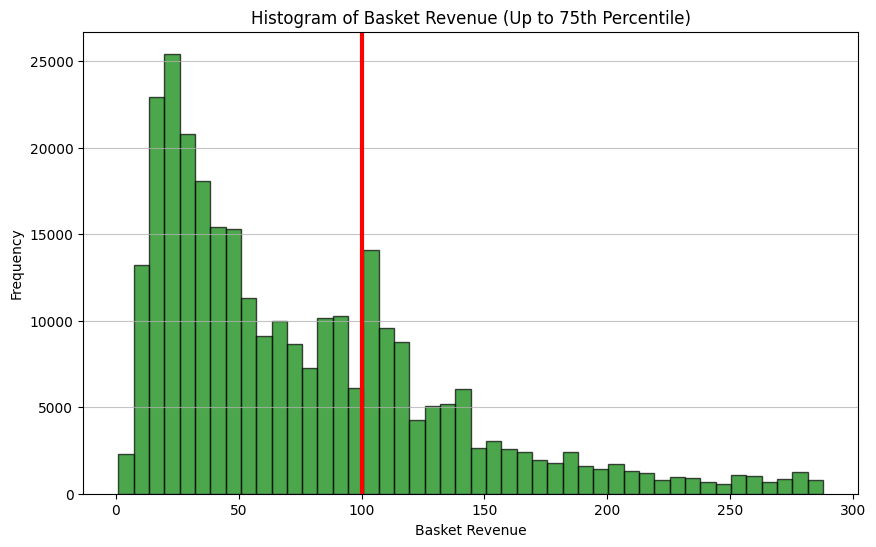

In [11]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(filtered_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.75 percentile
filtered_data = filtered_df[filtered_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
#58270/105021 # of removed baskets / # of baskets with "100 TL üzeri çatı" campaign

# Same percentage of data is randomly removed from baskets (other than "100 TL üzeri çatı")  to protect the distribution of the initial data

In [13]:
# Correcting the approach without using sum for concatenation

# Separate into two subsets without causing a TypeError
sample_df = filtered_df.copy()
contains_campaign = sample_df[sample_df['CAMPAIGN'].apply(lambda x: "100 TL üzeri çatı" in x)]
does_not_contain_campaign = sample_df[sample_df['CAMPAIGN'].apply(lambda x: "100 TL üzeri çatı" not in x)]

# Randomly remove 55.5% of the rows from the subset without the campaign
rows_to_keep = does_not_contain_campaign.sample(frac=1-0.555, random_state=492)

# Merge the two subsets back together
merged_df = pd.concat([contains_campaign, rows_to_keep]).sort_index()

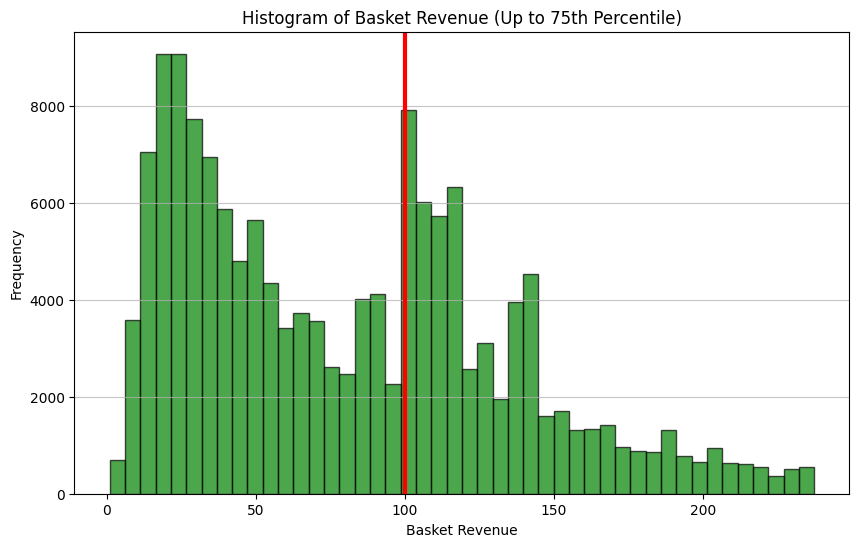

In [14]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(merged_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.75 percentile
filtered_data = merged_df[merged_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

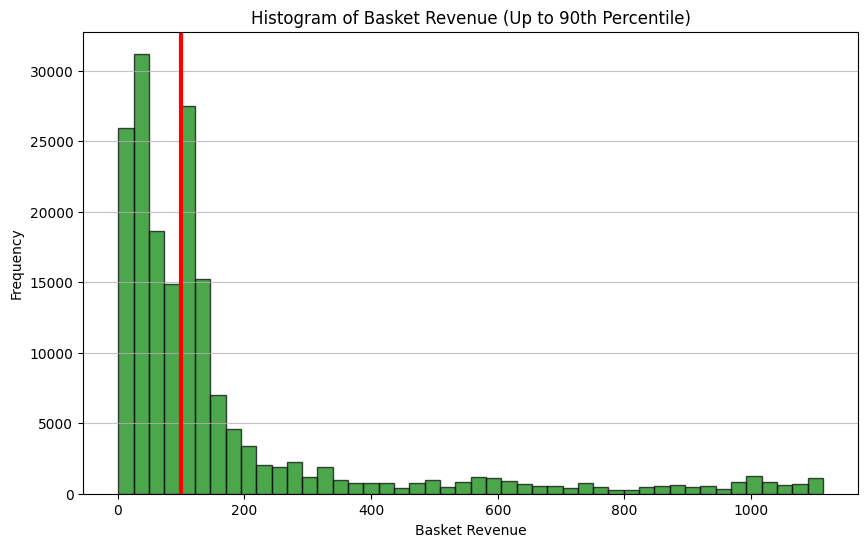

In [15]:
# Calculate the 0.90 percentile of the Basket Revenue to filter the data
percentile_90 = np.percentile(merged_df['Basket Revenue'], 90)

# Filter the data to include only up to the 0.75 percentile
filtered_data = merged_df[merged_df['Basket Revenue'] <= percentile_90]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 90th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Analyzing the effect of DESI on Real_SHC

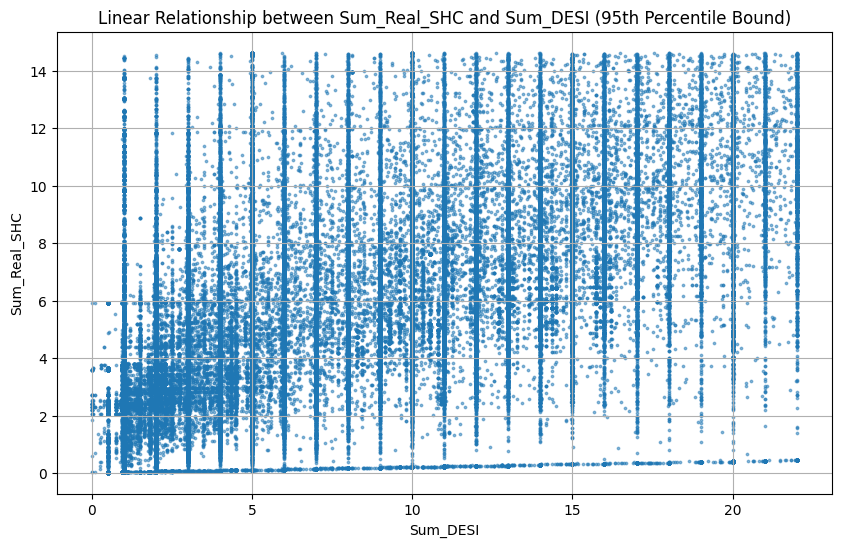

In [16]:
# Assuming new_df is the actual dataframe we want to work with, applying the percentile-based filtering

# Calculate the 95th percentile for both Sum_Real_SHC and Sum_DESI in the actual dataframe
upper_percentile_SHC_actual = new_df['Sum_Real_SHC'].quantile(0.95)
upper_percentile_DESI_actual = new_df['Sum_DESI'].quantile(0.95)

# Filter the actual dataframe to include only rows where both Sum_Real_SHC and Sum_DESI are below their respective 95th percentiles
filtered_df_percentile_actual = new_df[(new_df['Sum_Real_SHC'] <= upper_percentile_SHC_actual) & 
                                       (new_df['Sum_DESI'] <= upper_percentile_DESI_actual)]

# Plotting the filtered actual data without outliers above the 95th percentile
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df_percentile_actual['Sum_DESI'], filtered_df_percentile_actual['Sum_Real_SHC'], alpha=0.5, s=3)
plt.title('Linear Relationship between Sum_Real_SHC and Sum_DESI (95th Percentile Bound)')
plt.xlabel('Sum_DESI')
plt.ylabel('Sum_Real_SHC')
plt.grid(True)
plt.show()

In [17]:
correlation_coefficient = new_df['Sum_Real_SHC'].corr(new_df['Sum_DESI'])

# The Pearson correlation coefficient between Sum_Real_SHC and Sum_DESI is: 0.6938829633072248.

# Analyzing the shipment category of baskets

In [18]:
real_free_shipping = 0
contingent_free_shipping = 0
paid_shipping = 0
mixed_shipping = 0

# Iterate through each row to check conditions
for index, row in new_df.iterrows():
    # Check if all elements in FreeSH are True and all elements in CFreeSH are False
    if all(row['FreeSH']) and not any(row['CFreeSH']):
        real_free_shipping += 1
    # Check if all elements in FreeSH are False and all elements in CFreeSH are True
    elif not any(row['FreeSH']) and all(row['CFreeSH']):
        contingent_free_shipping += 1
    # Check if all elements in FreeSH are False and all elements in CFreeSH are False
    elif not any(row['FreeSH']) and not any(row['CFreeSH']):
        paid_shipping += 1
    # Otherwise, consider it as mixed shipping
    else:
        mixed_shipping += 1

print(f"Real Free Shipping: {real_free_shipping}")
print(f"Contingent Free Shipping: {contingent_free_shipping}")
print(f"Paid Shipping: {paid_shipping}")
print(f"Mixed Shipping: {mixed_shipping}")


Real Free Shipping: 143577
Contingent Free Shipping: 91877
Paid Shipping: 192445
Mixed Shipping: 21241


In [19]:
# First, let's copy the DataFrame
df_copy = new_df.copy()

# Define a function that categorizes each row based on the conditions provided
def categorize_shipping(row):
    if all(row['FreeSH']) and not any(row['CFreeSH']):
        return 'real_free_shipping'
    elif not any(row['FreeSH']) and all(row['CFreeSH']):
        return 'contingent_free_shipping'
    elif not any(row['FreeSH']) and not any(row['CFreeSH']):
        return 'paid_shipping'
    else:
        return 'mixed_shipping'

# Apply the function to each row of the DataFrame and create a new column with the result
df_copy['Shipping_Category'] = df_copy.apply(categorize_shipping, axis=1)
# Apply the function to each row of the DataFrame to create the new column
new_df['Shipping_Category'] = new_df.apply(categorize_shipping, axis=1)

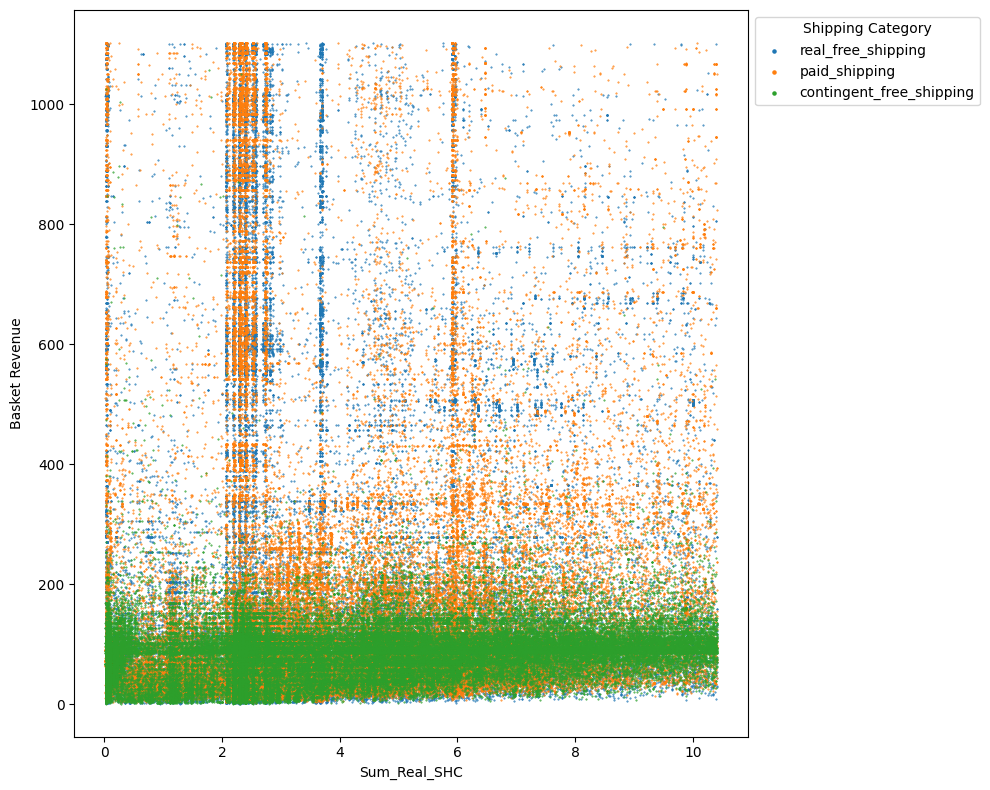

In [37]:
# Adjusting the quantile threshold
quantile_sum_real_shc = df_copy['Sum_Real_SHC'].quantile(0.9)
quantile_basket_revenue = df_copy['Basket Revenue'].quantile(0.9)

# Filter out outliers
df_filtered = df_copy[(df_copy['Sum_Real_SHC'] <= quantile_sum_real_shc) &
                      (df_copy['Basket Revenue'] <= quantile_basket_revenue)]

# Exclude 'mixed_shipping' from the filtered DataFrame
df_filtered = df_filtered[df_filtered['Shipping_Category'] != 'mixed_shipping']

# Plotting with an enlarged figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed

# Now 'categories' will only include categories present in 'df_filtered', excluding 'mixed_shipping'
categories = df_filtered['Shipping_Category'].unique()

for category in categories:
    subset = df_filtered[df_filtered['Shipping_Category'] == category]
    ax.scatter(subset['Sum_Real_SHC'], subset['Basket Revenue'], label=category, s=0.2)  # Dot size in the plot

ax.set_xlabel('Sum_Real_SHC')
ax.set_ylabel('Basket Revenue')
# Placing the legend outside the plot on the right, enlarging the dots only in the legend
ax.legend(title='Shipping Category', loc='upper left', bbox_to_anchor=(1, 1), markerscale=5)  # Increase markerscale as needed
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

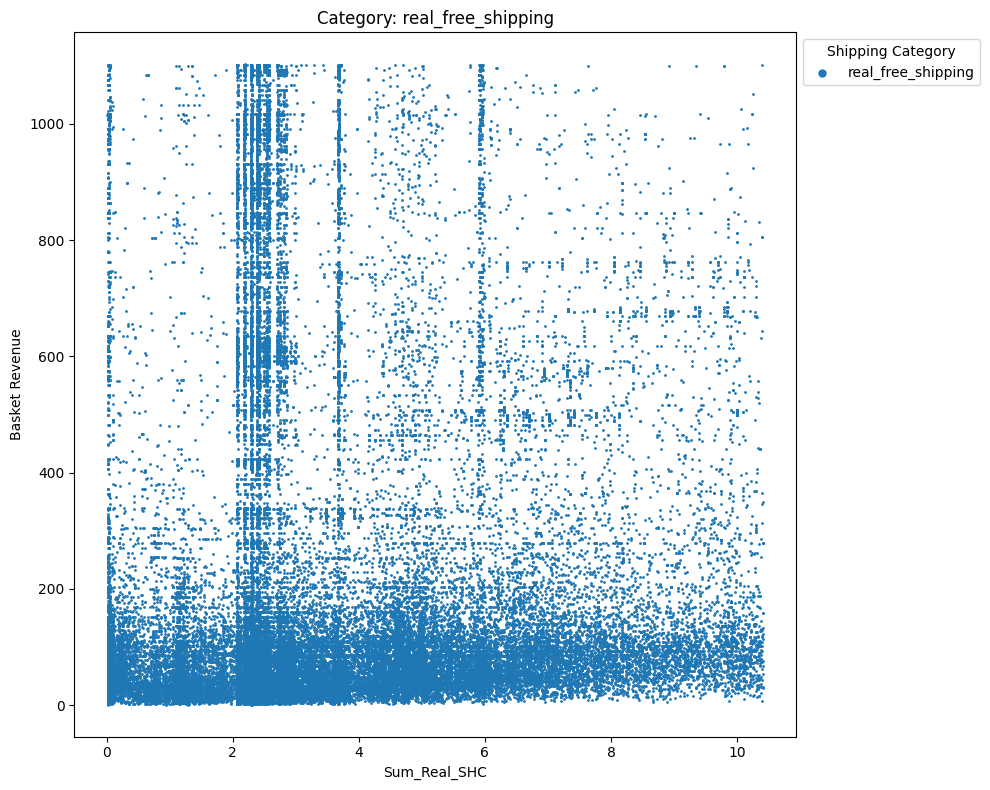

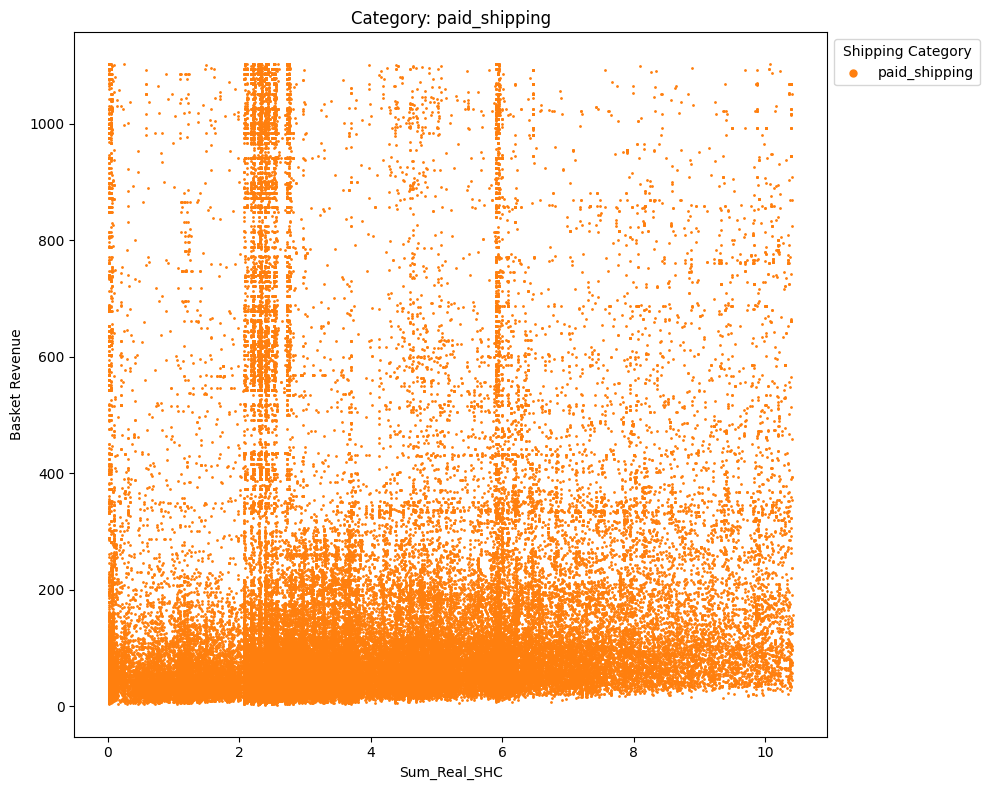

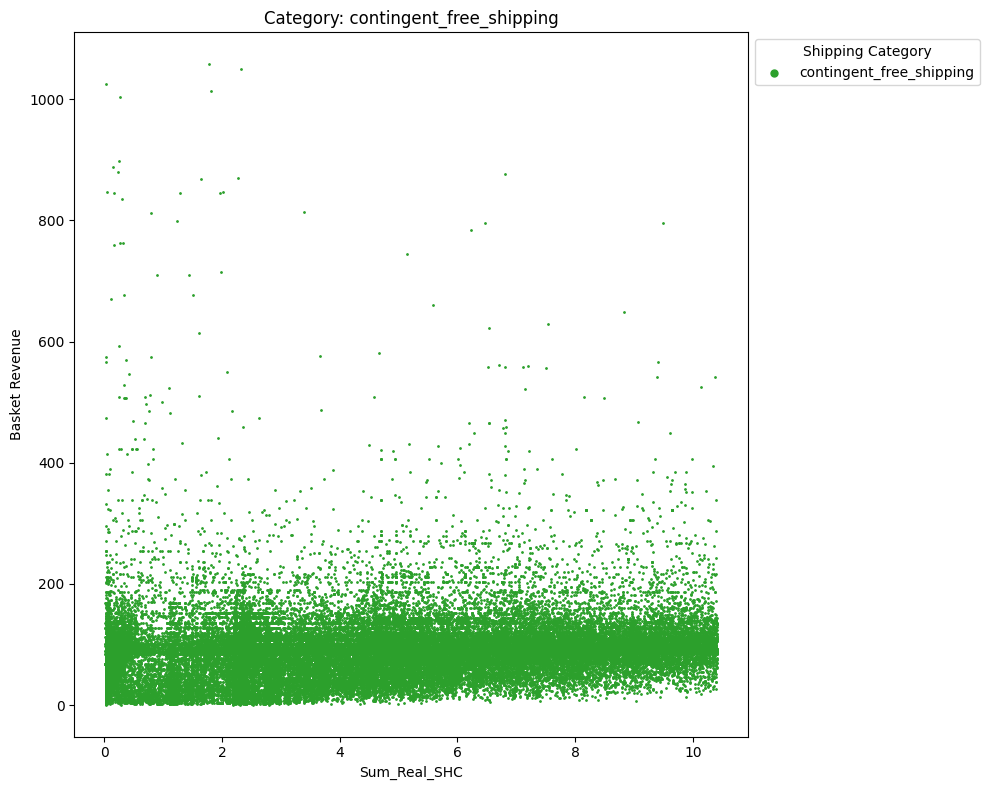

In [38]:
# Create a color map for consistent coloring across plots
categories = df_filtered['Shipping_Category'].unique()
color_map = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}

# Plot separate graphs for each category using the color map
for category in categories:
    fig, ax = plt.subplots(figsize=(10, 8))
    subset = df_filtered[df_filtered['Shipping_Category'] == category]
    ax.scatter(subset['Sum_Real_SHC'], subset['Basket Revenue'], label=category, s=1, color=color_map[category])
    
    ax.set_xlabel('Sum_Real_SHC')
    ax.set_ylabel('Basket Revenue')
    ax.legend(title='Shipping Category', loc='upper left', bbox_to_anchor=(1, 1), markerscale=5)
    plt.title(f"Category: {category}")
    plt.tight_layout()
    plt.show()

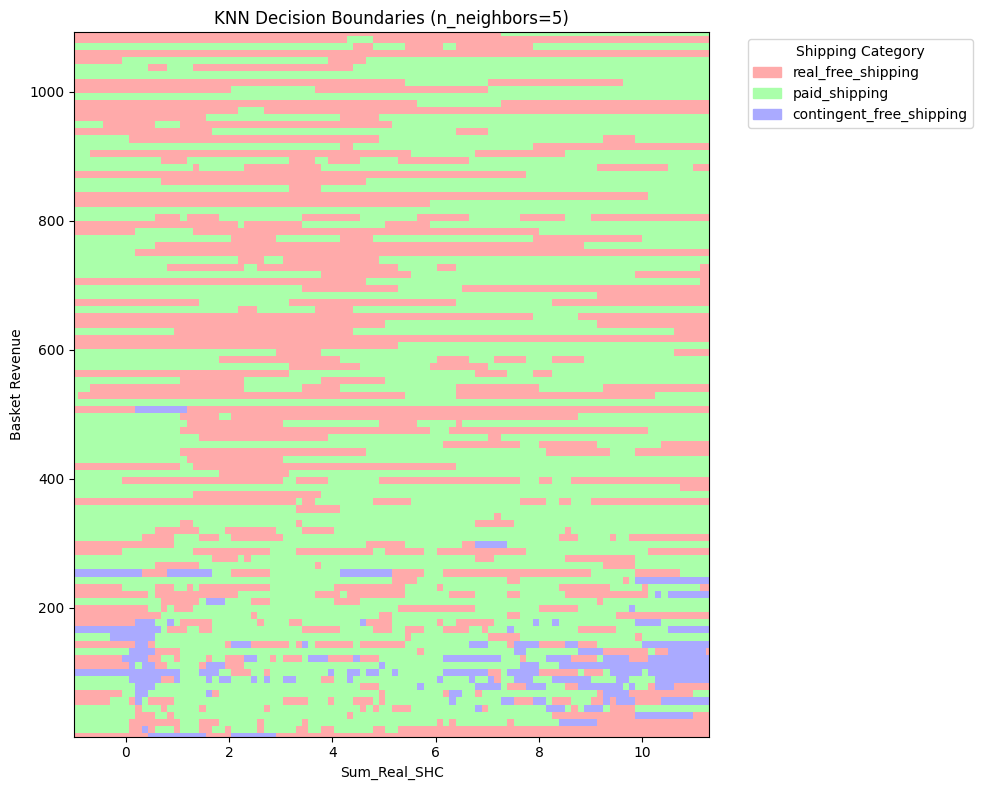

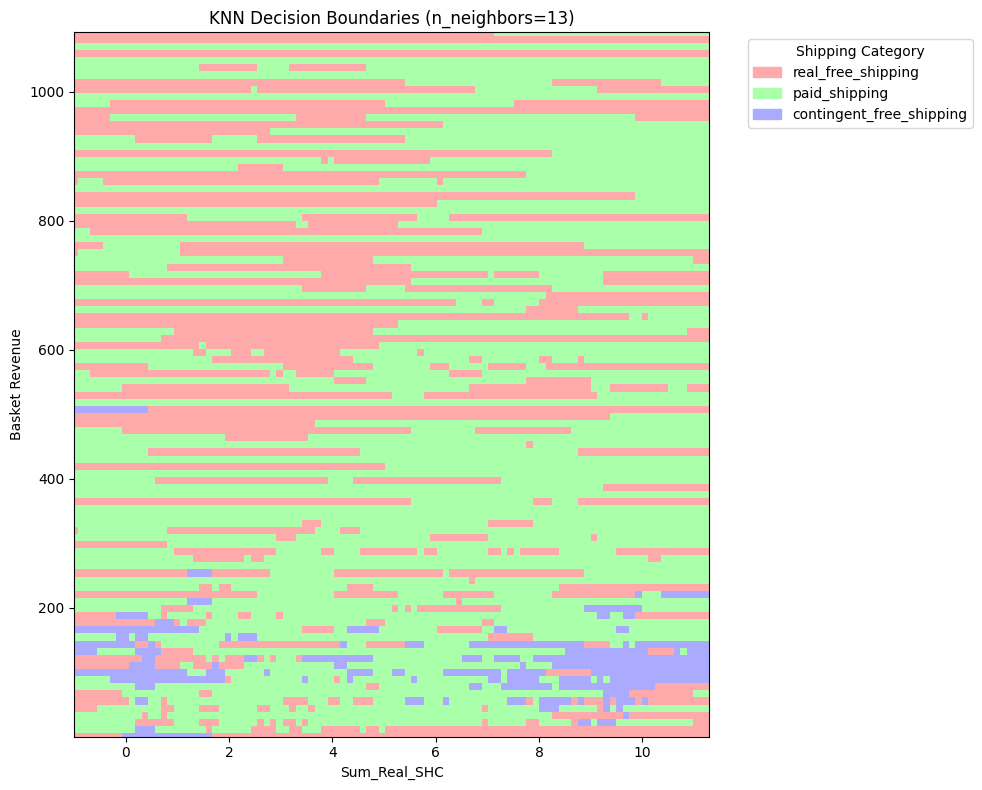

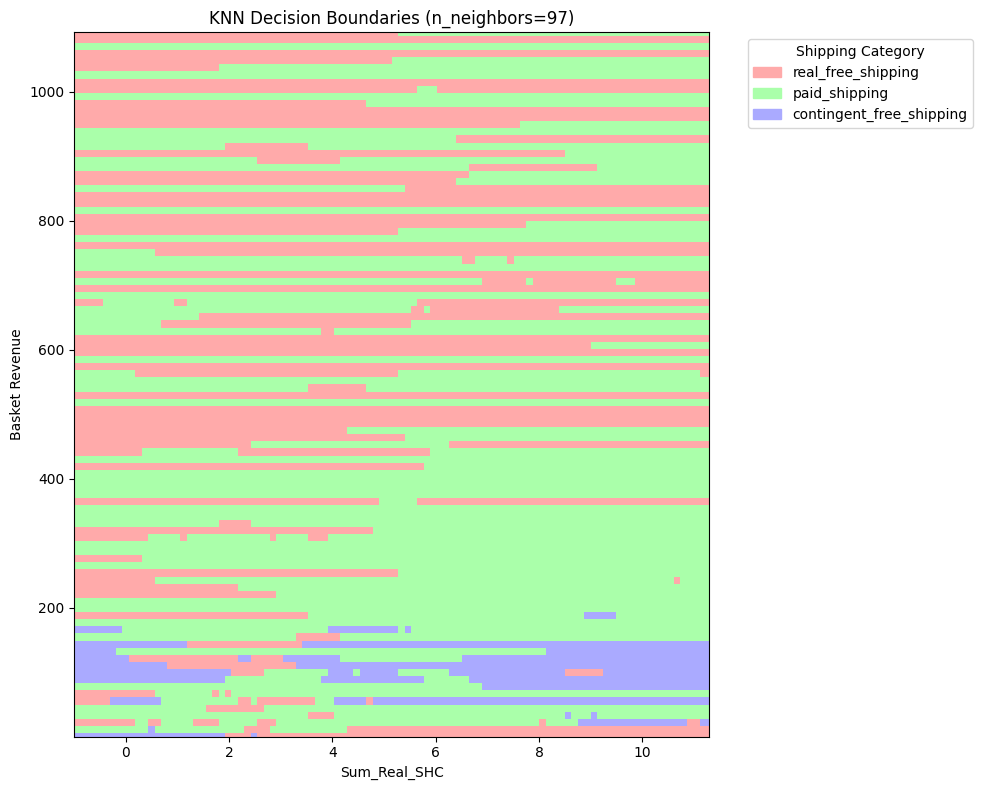

In [40]:
# Prepare the data
features = df_filtered[['Sum_Real_SHC', 'Basket Revenue']].values
target = df_filtered['Shipping_Category']

# Map string labels to integers
unique_labels = target.unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for label, i in label_to_int.items()}
target_numeric = np.array([label_to_int[label] for label in target])

# Define the boundaries for the meshgrid
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

# Create the meshgrid
# Determine the number of divisions you want along each axis
num_divisions = 100
h_x = (x_max - x_min) / num_divisions
h_y = (y_max - y_min) / num_divisions

xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))


def plot_knn_decision_boundaries(n_neighbors):
    # Fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(features, target_numeric)

    # Predict over the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_numeric = Z.reshape(xx.shape)  # Ensure Z is reshaped correctly

    # Plot
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z_numeric, cmap=cmap_light, shading='auto')

    # Create legend handles manually
    handles = [mpatches.Patch(color=cmap_light.colors[i], label=int_to_label[i]) for i in range(len(unique_labels))]

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN Decision Boundaries (n_neighbors={n_neighbors})")
    plt.xlabel('Sum_Real_SHC')
    plt.ylabel('Basket Revenue')

    # Add the custom legend to the plot
    plt.legend(handles=handles, title='Shipping Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function with different values of n_neighbors
plot_knn_decision_boundaries(5)
plot_knn_decision_boundaries(13)
plot_knn_decision_boundaries(97)

In [ ]:
# Creating a box plot
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Shipping_Category', y='Basket Revenue', data=df_filtered)
plt.title('Box Plot of Basket Revenue by Shipping Category')
plt.xlabel('Shipping Category')
plt.ylabel('Basket Revenue')
plt.xticks(rotation=45)  # Rotate category names for better visibility

# Collect quartile information
quartile_summary = ""
categories = df_filtered['Shipping_Category'].unique()
for category in categories:
    subset = df_filtered[df_filtered['Shipping_Category'] == category]['Basket Revenue']
    q1 = subset.quantile(0.25)
    q2 = subset.quantile(0.5)
    q3 = subset.quantile(0.75)
    quartile_summary += f"{category}: Q1={q1:.2f}, Median={q2:.2f}, Q3={q3:.2f}\n"

# Place the summary text box outside the plot
plt.gcf().text(1.02, 0.5, quartile_summary, fontsize=20, verticalalignment='center')

plt.tight_layout()
plt.show()

# Time Series Analysis (Category-Based) of Daily Revenues to see "Weekend" effect

In [ ]:
daily_revenue_by_category_weekend = df.groupby(['DATE', 'Category', 'Weekend'])['Revenue'].sum().reset_index()
daily_revenue_by_category_weekend

In [ ]:
plt.figure(figsize=(14, 20))

categories = df["Category"].unique()
for i, category in enumerate(categories, start=1):
    plt.subplot(len(categories), 1, i)
    category_data = daily_revenue_by_category_weekend[daily_revenue_by_category_weekend['Category'] == category]
    
    # Plot all data as a line
    plt.plot(category_data['DATE'], category_data['Revenue'], label=f"{category} Daily Revenue", color='blue')
    
    # Mark weekend data points based on 'Weekend' column
    weekend_data = category_data[category_data['Weekend'] == True]
    plt.scatter(weekend_data['DATE'], weekend_data['Revenue'], label=f"{category} Weekends", color='red', s=10)  # s is the size of the marker
    
    plt.title(category)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    weekly_locator = WeekdayLocator(byweekday=MO)
    formatter = DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_locator(weekly_locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.show()

# Time Series Analysis (Campaign-Based) of Daily Revenues

In [ ]:
# Grouping by 'DATE', 'CAMPAIGN', and 'Weekend' to sum the revenues
grouped_revenue = df.groupby(['DATE', 'CAMPAIGN', 'Weekend'])['Revenue'].sum().reset_index()

# Calculating total daily revenue
daily_total_revenue = grouped_revenue.groupby('DATE')['Revenue'].sum().reset_index()
daily_total_revenue = daily_total_revenue.rename(columns={'Revenue': 'Total_Daily_Revenue'})

# Merging to get total daily revenue back into our grouped dataframe
grouped_revenue_with_total = pd.merge(grouped_revenue, daily_total_revenue, on='DATE')

# Calculating the percentage
grouped_revenue_with_total['Percentage'] = (grouped_revenue_with_total['Revenue'] / grouped_revenue_with_total['Total_Daily_Revenue']) * 100

grouped_revenue_with_total

In [ ]:
campaigns = df['CAMPAIGN'].unique()
campaigns

In [ ]:
plt.figure(figsize=(14, 20))

for i, campaign in enumerate(campaigns, start=1):
    plt.subplot(len(campaigns), 1, i)
    campaign_data = grouped_revenue_with_total[grouped_revenue_with_total['CAMPAIGN'] == campaign]
    
    # Plot all data as a line
    plt.plot(campaign_data['DATE'], campaign_data['Percentage'], label=f"{campaign} Daily Percentage", color='blue')
    
    # Mark weekend data points based on 'Weekend' column
    weekend_data = campaign_data[campaign_data['Weekend'] == True]
    plt.scatter(weekend_data['DATE'], weekend_data['Percentage'], label=f"{campaign} Weekends", color='red', s=10)  # s is the size of the marker
    
    plt.title(campaign)
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    weekly_locator = WeekdayLocator(byweekday=MO)
    formatter = DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_locator(weekly_locator)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.show()